In [1]:
import pandas as pd
import numpy as np

In [2]:
spam=pd.read_csv('sms_spam.csv')

In [3]:
spam.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
spam['type']=np.where(spam['type']=='spam',1,-1)
spam.head()

,type,text
0,-1,"Go until jurong point, crazy.. Available only ..."
1,-1,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,-1,U dun say so early hor... U c already then say...
4,-1,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen=100
max_words=1000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(spam['text'])
sequences=tokenizer.texts_to_sequences(spam['text'])
data=pad_sequences(sequences,maxlen=maxlen)
word_index=tokenizer.word_index
print('Found %s unique tokens' %len(word_index))

Using TensorFlow backend.
C:\Users\Srinivas\Anaconda3\envs\myenvs\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Srinivas\Anaconda3\envs\myenvs\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Srinivas\Anaconda3\envs\myenvs\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Srinivas\Anaconda3\envs\my

Found 8992 unique tokens


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
st=stopwords.words("english")
por=PorterStemmer()
spam['text']=spam['text'].apply(lambda x: ' '.join([por.stem(i) for i in word_tokenize(x) if i not in st and i.isalpha() ]  ))

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
st=stopwords.words("english")
lemm=WordNetLemmatizer()
spam['text']=spam['text'].apply(lambda x: ' '.join([lemm.lemmatize(i) for i in word_tokenize(x) if i not in st and i.isalpha() ]  ))

In [7]:
X=spam['text']
Y=np.array(spam['type'])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf1=tf.fit(X_train)
X_train_vectorised=tf1.transform(X_train)
X_test_vectorised=tf1.transform(X_test)
X_train_vectorised[0][0]

<1x5196 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [11]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts
tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
tf_idf_matrix = tf_idf_vectorizer.fit_transform(spam['text'])

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tf_idf_matrix)
# print labels

X1 = tf_idf_matrix.todense()

C:\Users\Srinivas\Anaconda3\envs\myenvs\lib\site-packages\sklearn\cluster\_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
C:\Users\Srinivas\Anaconda3\envs\myenvs\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


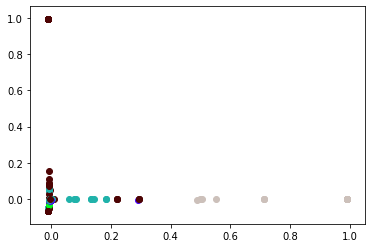

In [13]:
reduced_data = PCA(n_components=pca_num_components).fit_transform(X1)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

In [14]:
# t-SNE plot


In [12]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import *
model=BernoulliNB()
model.fit(X_train_vectorised,Y_train)
Y_pred=model.predict(X_test_vectorised)
accuracy_score(Y_test,Y_pred)

0.9695067264573991

In [13]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(C=0.05,loss='squared_hinge',max_iter=2000,random_state=1000)
pac.fit(X_train_vectorised,Y_train)
y_pred=pac.predict(X_test_vectorised)
accuracy_score(Y_test,y_pred)

0.9748878923766816

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred)

0.9019776714513558

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred)

0.9326794258373204

In [15]:
from sklearn.metrics import precision_score
print(precision_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))

0.9851851851851852
0.806060606060606


In [16]:
from sklearn.metrics import precision_score
print(precision_score(Y_test,y_pred))
print(recall_score(Y_test,y_pred))

0.9536423841059603
0.8727272727272727


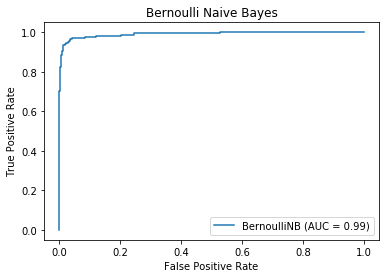

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model,X_test_vectorised,Y_test)
plt.title("Bernoulli Naive Bayes")
plt.show()

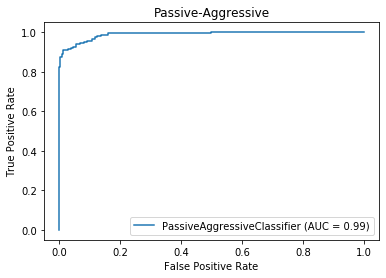

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(pac,X_test_vectorised,Y_test)
plt.title("Passive-Aggressive")
plt.show()

0.9560538116591928
0.8590271132376395
0.9754098360655737
0.7212121212121212


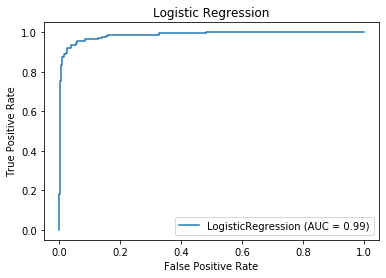

In [19]:
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression()
logit.fit(X_train_vectorised,Y_train)
yy_pred=logit.predict(X_test_vectorised)
print(accuracy_score(Y_test,yy_pred))
print(roc_auc_score(Y_test,yy_pred))
print(precision_score(Y_test,yy_pred))
print(recall_score(Y_test,yy_pred))
plot_roc_curve(logit,X_test_vectorised,Y_test)
plt.title("Logistic Regression")
plt.show()

In [20]:
validation_accuracy=[]
for(x,y) in zip(X_train_vectorised
                ,Y_train):
    pac.partial_fit(x,y.ravel(),classes=np.unique(spam['type']))
    validation_accuracy.append(pac.score(X_test_vectorised,Y_test))
    

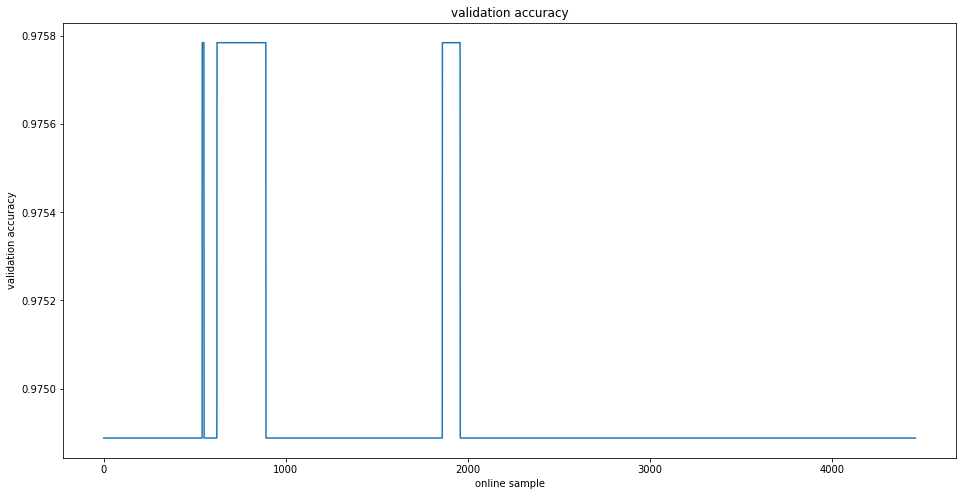

In [21]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(16,8))
ax.plot(validation_accuracy)
plt.xlabel('online sample')
plt.ylabel('validation accuracy')
plt.title("validation accuracy")
plt.show()

In [22]:
score=[]
c=[0.000045,0.00335,0.00247,0.135,1,7.389,54.59,403.42]
for i in c:
    pac=PassiveAggressiveClassifier(C=i,loss='squared_hinge',max_iter=2000,random_state=1000)
    pac.fit(X_train_vectorised,Y_train)
    y_pred=pac.predict(X_test_vectorised)
    score.append(accuracy_score(Y_test,y_pred))
score
    
    

[0.895067264573991,
 0.9730941704035875,
 0.9721973094170404,
 0.9748878923766816,
 0.9748878923766816,
 0.9721973094170404,
 0.967713004484305,
 0.862780269058296]

In [23]:
C=np.log(c)
C

array([-10.00884807,  -5.69879493,  -6.00353713,  -2.0024805 ,
         0.        ,   1.99999241,   3.99985072,   5.9999782 ])

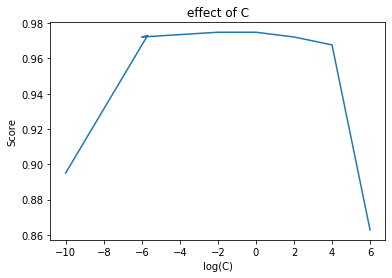

In [24]:
plt.plot(C,score)
plt.xlabel('log(C)')
plt.ylabel('Score')
plt.title("effect of C")
plt.show()